# K Mean Clustering

In [ ]:
!pip install matplotlib sklearn pandas numpy seaborn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
#Making blobs
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [ ]:
x.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

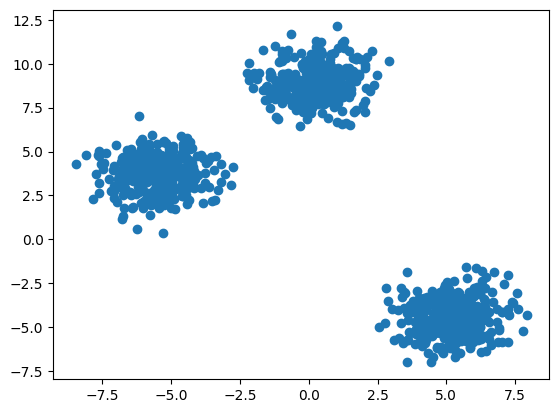

In [ ]:
plt.scatter(x[:,0],x[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)
# x_train: The training portion of the features.
# x_test: The testing portion of the features.
# y_train: The training portion of the labels.
# y_test: The testing portion of the labels.

In [ ]:
from sklearn.cluster import KMeans

Manual Process -- Elbow Method

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[25887.665265226482,
 5906.709667290279,
 962.2780187929342,
 831.7195364199673,
 752.8077136557857,
 624.576314542443,
 569.7207293169837,
 479.3490267575276,
 464.4887983157388,
 394.2396401752603]

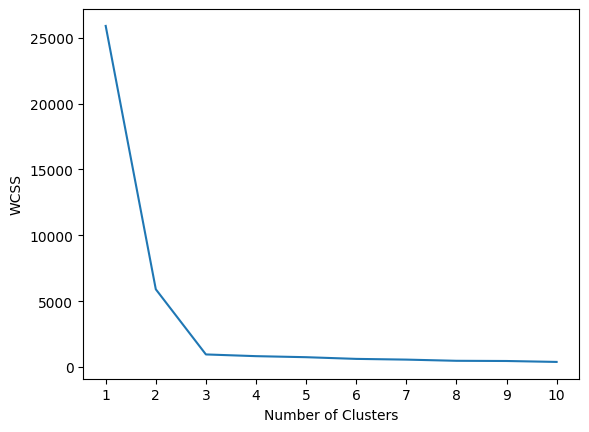

In [ ]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [ ]:
y_label=kmeans.fit_predict(x_train)

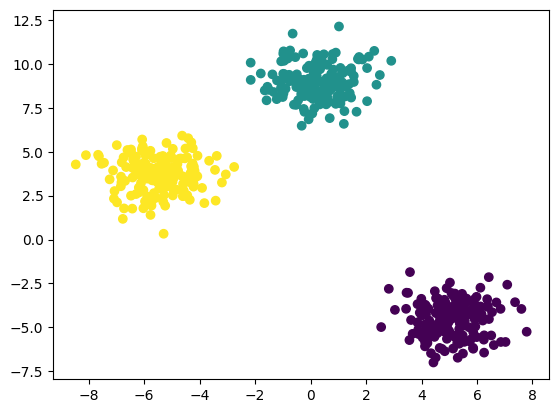

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_label)

In [ ]:
y_label=kmeans.predict(x_train)

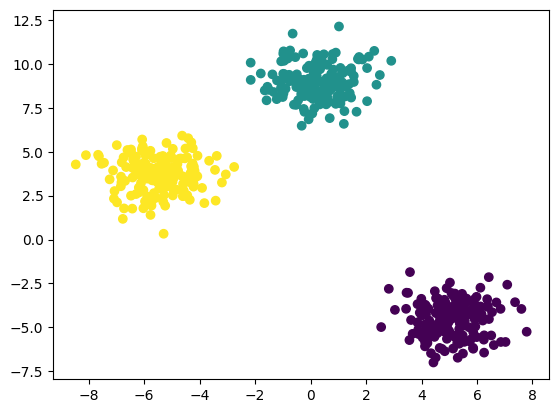

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_label)

In [ ]:
y_test_label=kmeans.predict(x_test)

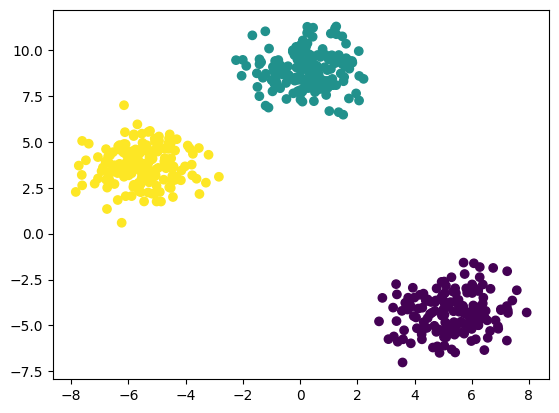

In [ ]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_label)

Automatic Clusturing

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [ ]:
kl.elbow

3

Silhoutte Score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhoutte_coefficients=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(x_train)
  score=silhouette_score(x_train,kmeans.labels_)
  silhoutte_coefficients.append(score)

In [ ]:
silhoutte_coefficients

[0.7288318110797759,
 0.8080704383340162,
 0.6482003623368298,
 0.4812598412499525,
 0.4663739863973263,
 0.3555349990932091,
 0.5146681186397756,
 0.35901987079673814,
 0.34677716867638425]

Text(0, 0.5, 'Silhoutte Coefficient')

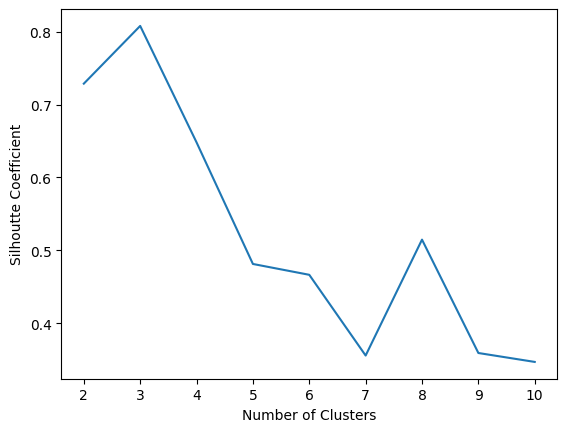

In [ ]:
plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Coefficient')

# Hierarichal Clustering

In [ ]:
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()

In [ ]:
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Feature Scale
#4D to 2D
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_scaled=scaler.fit_transform(iris_data)

In [ ]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
x_scaled.shape

(150, 4)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2) #4D to 2D

In [ ]:
pca_scaled=pca.fit_transform(x_scaled)

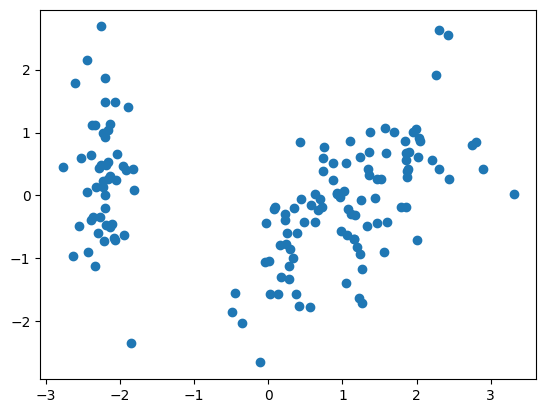

In [ ]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Euclidean Distance')

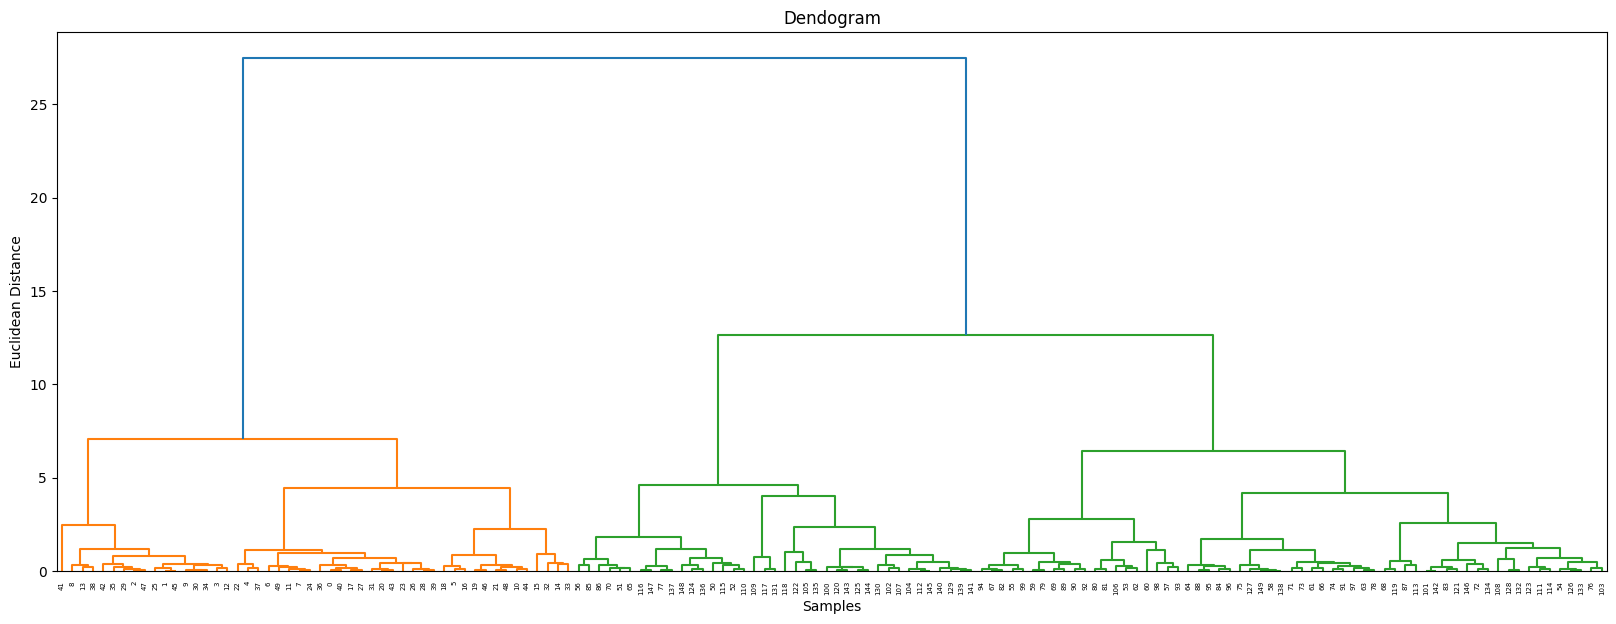

In [ ]:
#Agglomerative Clustering
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title('Dendrogram')
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title("Dendogram")
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [ ]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

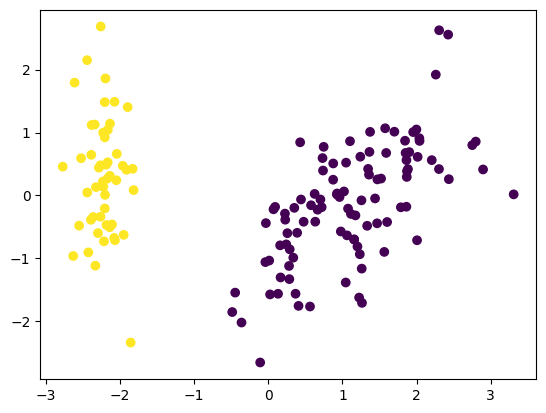

In [ ]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhoutte_coefficients=[]
for i in range(2,11):
  agglo=AgglomerativeClustering(n_clusters=i,metric='euclidean',linkage='ward')
  agglo.fit(x_scaled)
  score=silhouette_score(x_scaled,agglo.labels_)
  silhoutte_coefficients.append(score)

Text(0, 0.5, 'Silhoutte Coefficient')

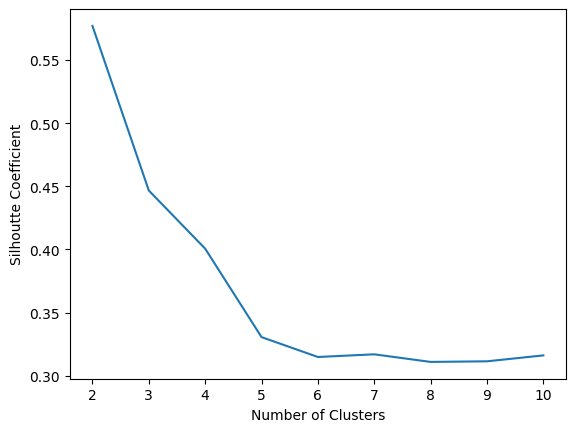

In [ ]:
plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Coefficient')

# DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x,y=make_moons(n_samples=250,noise=0.05)

In [ ]:
x

array([[ 1.0440426 , -0.49733687],
       [ 0.32736259,  0.95881893],
       [ 0.03264443,  0.27281813],
       [ 0.96365933,  0.25699147],
       [ 0.91781538, -0.45930421],
       [ 0.32947795, -0.31347037],
       [ 0.07885031,  0.94160801],
       [ 0.26565202, -0.23190962],
       [ 0.90108662, -0.55650105],
       [ 1.97920193,  0.1443795 ],
       [ 0.76420598,  0.56379111],
       [ 1.47271985, -0.39884026],
       [ 1.88380838,  0.20013664],
       [ 0.13738614, -0.12733743],
       [-0.0320975 ,  0.35532089],
       [ 0.79953331, -0.50167439],
       [ 0.78951952, -0.59228033],
       [ 0.29273784, -0.01524585],
       [ 0.70118853, -0.46728326],
       [-0.13339763,  0.98330075],
       [-0.83203606,  0.55543584],
       [ 1.85977515, -0.04581258],
       [ 0.96084161,  0.09355222],
       [ 0.05476493,  0.98311326],
       [-0.20474292,  0.96191844],
       [ 0.93400717,  0.06927843],
       [ 1.22514575, -0.41731302],
       [ 0.00416889,  0.50057568],
       [-0.92983718,

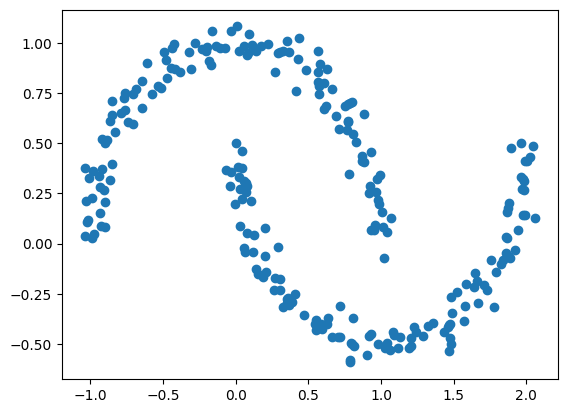

In [ ]:
plt.scatter(x[:,0],x[:,1])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [ ]:
x_scaled=scaler.fit_transform(x)

In [ ]:
dbscan=DBSCAN(eps=0.5)

In [ ]:
dbscan.fit(x_scaled)

DBSCAN()

In [ ]:
dbscan.labels_

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1])

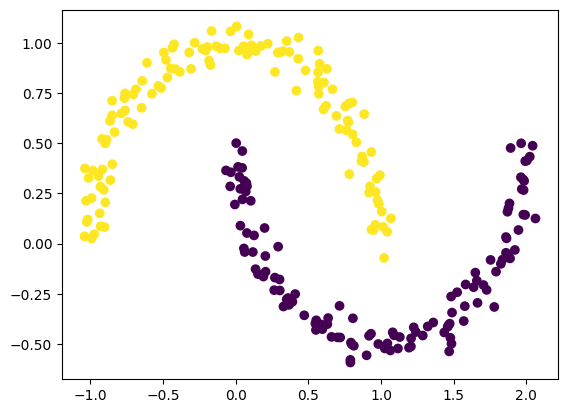

In [ ]:
plt.scatter(x[:,0],x[:,1],c=dbscan.labels_)

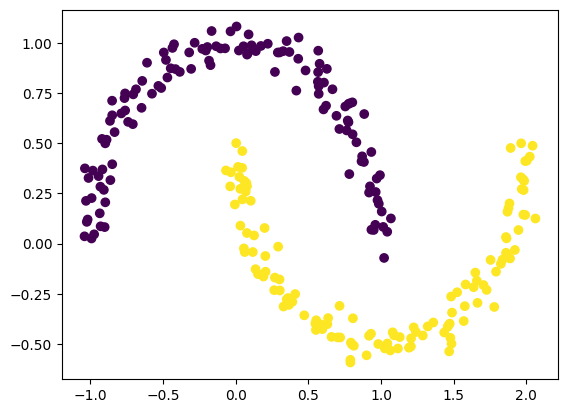

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y)